# Sandbox
Notebook to test code before real implementation

In [2]:
################ ONLY PYTHON 2 #########################
from __future__ import division
from __future__ import print_function
from operator import itemgetter
from itertools import combinations, chain, product
from collections import defaultdict
import argparse
import time
import os
import tensorflow as tf
import numpy as np
import networkx as nx
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import psutil
import pickle
from decagon.deep.optimizer import DecagonOptimizer
from decagon.deep.model import DecagonModel
from decagon.deep.minibatch import EdgeMinibatchIterator
from decagon.utility import rank_metrics, preprocessing
from decagon.utility.preprocessing import sparse_to_tuple

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/juan/anaconda3/envs/decagon/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
################ ONLY PYTHON 3 #########################
import numpy as np
import pandas as pd
import scipy.sparse as sp
import time
import os
import psutil
import pickle
from pybdm import BDM
from pybdm.utils import decompose_dataset
from pybdm.partitions import PartitionIgnore
from pybdm.partitions import PartitionRecursive
from joblib import Parallel, delayed
from joblib import parallel_backend
from data.algorithms import PerturbationExperiment, NodePerturbationExperiment
import math
import datetime as dt
from itertools import product

# Metis testing

In [2]:
import metis
import networkx as nx

In [25]:
# test random adj matrix
s = 100
b = np.random.randint(0,2,size=[s,s])
sym = np.floor((b+b.T)/2).astype(int)
sym[:,3] = np.zeros(s)
sym[3,:] = np.zeros(s)
ppi_adj = sp.csc_matrix(sym)
print(np.count_nonzero(sym))

2468


In [26]:
syms = sp.coo_matrix(sym)

In [27]:
def adj_mat2adj_list(mat):
    l = []
    for i in range(mat.shape[0]):
        idx = np.asarray(mat.row==i).nonzero()
        l.append(tuple(mat.col[idx]))
    return l

In [28]:
adj_list = adj_mat2adj_list(syms)

In [29]:
adj_list

[(1, 11, 13, 17, 26, 31, 44, 50, 54, 56, 63, 68, 72, 73, 79, 80, 94),
 (0,
  4,
  14,
  15,
  18,
  20,
  25,
  30,
  34,
  38,
  41,
  46,
  47,
  49,
  51,
  61,
  65,
  66,
  69,
  77,
  79,
  80,
  87,
  90,
  93),
 (5,
  9,
  15,
  16,
  18,
  20,
  22,
  26,
  27,
  29,
  33,
  35,
  37,
  41,
  45,
  57,
  60,
  64,
  65,
  67,
  73,
  78,
  79,
  88,
  89),
 (),
 (1,
  7,
  10,
  11,
  12,
  16,
  18,
  20,
  21,
  22,
  23,
  24,
  41,
  48,
  50,
  58,
  62,
  63,
  64,
  66,
  71,
  84,
  92),
 (2,
  8,
  10,
  11,
  16,
  24,
  26,
  29,
  30,
  36,
  37,
  38,
  44,
  46,
  48,
  54,
  65,
  67,
  74,
  82,
  83,
  89,
  90,
  91,
  92,
  94,
  95),
 (6,
  7,
  9,
  13,
  14,
  15,
  17,
  20,
  25,
  38,
  40,
  46,
  58,
  61,
  62,
  64,
  67,
  73,
  75,
  80,
  84,
  86,
  87,
  95,
  97,
  98),
 (4,
  6,
  7,
  9,
  11,
  19,
  20,
  23,
  26,
  28,
  33,
  34,
  35,
  37,
  46,
  54,
  61,
  75,
  76,
  81,
  84,
  88,
  95,
  96),
 (5,
  8,
  11,
  14,
  16,
  17,


In [8]:
metis.adjlist_to_metis(adj_list)

METIS_Graph(nvtxs=c_int(100), ncon=c_int(1), xadj=<metis.c_int_Array_101 object at 0x7f6c05f9f4d0>, adjncy=<metis.c_int_Array_2529 object at 0x7f6c05f9f560>, vwgt=None, vsize=None, adjwgt=None)

In [9]:
s,parts = metis.part_graph(adj_list,nparts=5)

In [12]:
with open('data/data_structures/DS/DS_real_DSE_9702_genes_5092_drugs_639_se_964','rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

gene2idx Imported successfully
drug2idx Imported successfully
se_mono_name2idx Imported successfully
se_combo_name2idx Imported successfully
ddi_adj_list Imported successfully
ddi_degrees_list Imported successfully
dti_adj Imported successfully
ppi_adj Imported successfully
ppi_degrees Imported successfully
drug_feat Imported successfully


In [14]:
ppi_adj = sp.coo_matrix(ppi_adj)

In [16]:
ppi_list = adj_mat2adj_list(ppi_adj)

In [17]:
s,parts = metis.part_graph(ppi_list,50)

(array([ 98., 103., 104.,  99., 104.,  98., 101., 103., 102., 104.,  98.,
        103.,  99.,  98., 104.,  99.,  98., 104., 101., 104., 104., 103.,
        104.,  99., 104., 101., 104., 103., 104., 102., 103.,  99., 103.,
        100., 100., 104., 104., 101.,  99., 102., 103., 104., 102., 100.,
        104., 103., 102., 104., 100., 103.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <BarContainer object of 50 artists>)

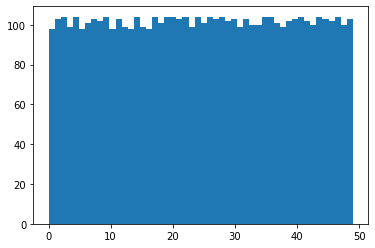

In [21]:
hist(parts,bins=50)

In [3]:
with open('data/data_structures/MINIBATCH/MINIBATCH_real_genes_5092_drugs_639_se_964_batchsize_512_valsize_0.15','rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

mb_vms Imported successfully
minibatch Imported successfully
mb_time Imported successfully
mb_rss Imported successfully


In [6]:
minibatch.train_edges[0,0][0]

array([[   0,    1],
       [   0,    3],
       [   0,    4],
       ...,
       [5087, 5087],
       [5088, 5088],
       [5091, 5091]], dtype=int32)

In [16]:
edge_types = {
    (0,0):1,
    (0,1):1,
    (1,0):1,
    (1,1):964
}

In [22]:
for i, j in edge_types:
    for k in range(edge_types[i,j]):
        print(i,j,len(minibatch.train_edges[i,j][k])/512)

0 1 10.96875
1 0 10.96875
0 0 36.50390625
1 1 77.6328125
1 1 73.75390625
1 1 70.73046875
1 1 68.2890625
1 1 66.35546875
1 1 65.87109375
1 1 64.87890625
1 1 64.8515625
1 1 63.78515625
1 1 62.55078125
1 1 59.68359375
1 1 59.3125
1 1 59.16796875
1 1 75.08203125
1 1 57.7890625
1 1 56.9140625
1 1 54.66015625
1 1 54.0234375
1 1 53.71484375
1 1 52.60546875
1 1 52.58984375
1 1 51.93359375
1 1 51.36328125
1 1 51.34765625
1 1 51.015625
1 1 50.9296875
1 1 85.40234375
1 1 49.31640625
1 1 49.0
1 1 48.76171875
1 1 65.28125
1 1 48.1796875
1 1 47.9609375
1 1 47.93359375
1 1 47.859375
1 1 47.6015625
1 1 46.44140625
1 1 46.42578125
1 1 45.95703125
1 1 45.0625
1 1 44.8984375
1 1 44.26953125
1 1 43.3359375
1 1 42.23046875
1 1 42.2109375
1 1 42.19140625
1 1 41.80859375
1 1 41.49609375
1 1 41.26953125
1 1 41.2578125
1 1 39.859375
1 1 39.58984375
1 1 39.11328125
1 1 39.09375
1 1 39.03515625
1 1 39.0078125
1 1 38.94921875
1 1 38.484375
1 1 49.0
1 1 38.24609375
1 1 38.16015625
1 1 38.02734375
1 1 37.54296875
1

### Classical pickle importing

In [2]:
with open('data/data_structures/DS/DS_real_DSE_9702_genes_19081_drugs_639_se_964','rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

gene2idx Imported successfully
drug2idx Imported successfully
se_mono_name2idx Imported successfully
se_combo_name2idx Imported successfully
ddi_adj_list Imported successfully
ddi_degrees_list Imported successfully
dti_adj Imported successfully
ppi_adj Imported successfully
ppi_degrees Imported successfully
drug_feat Imported successfully


In [ ]:
with tf.Session() as sess:
  print(sess.run(tf.convert_to_tensor(b)),type(sess.run(b)))

# Exploring BDM to make it sparse

In [ ]:
with open('data/data_structures/BDM/DDI_BDM_real_se_964_drugs_639_juadia72','rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
sim_nodes = nodebdm_ddi_list[0]
srt_nodes = sort(sim_nodes)
sim_add = add_edgebdm_ddi_list[0]
srt_add = sort(sim_add)
sim_rem = rem_edgebdm_ddi_list[0]
srt_rem = sort(sim_rem)

In [ ]:
# Numerical differentiation
x = np.arange(len(sim_nodes))
dy_nodes = np.zeros(srt_nodes.shape,np.float)
dy_nodes[0:-1] = np.diff(srt_nodes)/np.diff(x)
dy_nodes[-1] = (srt_nodes[-1] - srt_nodes[-2])/(x[-1] - x[-2])
dy_nodes = dy_nodes/np.linalg.norm(dy_nodes)
dy_add = np.zeros(srt_add.shape,np.float)
dy_add[0:-1] = np.diff(srt_nodes)/np.diff(x)
dy_add[-1] = (srt_add[-1] - srt_add[-2])/(x[-1] - x[-2])
dy_add = dy_add/np.linalg.norm(dy_add)
dy_rem = np.zeros(srt_rem.shape,np.float)
dy_rem[0:-1] = np.diff(srt_rem)/np.diff(x)
dy_rem[-1] = (srt_rem[-1] - srt_rem[-2])/(x[-1] - x[-2])
dy_rem = dy_rem/np.linalg.norm(dy_rem)

In [ ]:
# Discrete convolution of derivative
win = 50
v = (1/win)*np.ones(win)
conv_dy_nodes = np.convolve(dy_nodes,v,mode='same')
conv_dy_add = np.convolve(dy_add,v,mode='same')
conv_dy_rem = np.convolve(dy_rem,v,mode='same')

In [ ]:
figure(figsize=[15,12])
subplot(3,3,1)
plot(sim_nodes)
title('Node BDM')
subplot(3,3,2)
hist(sim_nodes)
title('Node BDM')
subplot(3,3,3)
#plot(srt_nodes)
plot(dy_nodes)
plot(conv_dy_nodes)
title('Node BDM')
subplot(3,3,4)
plot(sim_add)
title('Add edges')
subplot(3,3,5)
hist(sim_add)
title('Add edges')
subplot(3,3,6)
#plot(srt_add)
plot(dy_add)
plot(conv_dy_add)
title('Node BDM')
subplot(3,3,7)
plot(sim_rem)
title('Remove edges')
subplot(3,3,8)
hist(sim_rem)
title('Remove edges')
subplot(3,3,9)
#plot(srt_rem)
plot(dy_rem)
plot(conv_dy_rem)
title('Node BDM')

1. Biological meaning of adding edges
2. How to calculate thresholds
    Filtering?

In [ ]:
down_threshold = -500
up_threshold = 500

In [ ]:
neg = nodebdm_ppi<down_threshold
pos = nodebdm_ppi>up_threshold

In [ ]:
bin_nodebdm_ppi = neg.astype(int)*-1+pos.astype(int)

In [ ]:
plot(bin_nodebdm_ppi)

# Create random symmetric adj matrix

In [ ]:
# test random adj matrix
s = 100
b = np.random.randint(0,2,size=[s,s])
sym = np.floor((b+b.T)/2).astype(int)
sym[:,3] = np.zeros(s)
sym[3,:] = np.zeros(s)
ppi_adj = sp.csc_matrix(sym)
print(np.count_nonzero(sym))

## Revisar si adj mats contienen el 1 en la diagonal

In [ ]:
with open('data/data_structures/DS/DS_real_DSE_9700_genes_16837_drugs_636_se_7','rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
ddi_adj_list[0].todense()

# TWOSIDES

In [ ]:
DF = pd.read_csv('../Thesis_datasets/TWOSIDES/small.csv',sep=',',usecols=[0,1,2,3,4,5])
DEC = pd.read_csv('data/original_data/bio-decagon-combo.csv',sep=',')

In [ ]:
DEC.head()

In [ ]:
DF.head(10)

### Transform Dictionaries Side effects
`meddra.tsv` is a database that contains names of side effects in both wanted ids

In [ ]:
map_se = pd.read_csv('../Thesis_datasets/SIDER/meddra.tsv', sep = '\t'\
                     ,header=None).rename(columns={0:'UMLS',1:'kind',2:'MedDRA',3:'name'})
cui = pd.unique(map_se['UMLS'].values)
meddra = pd.unique(map_se['MedDRA'].values)
ses = pd.unique(map_se['name'].values)
print('Total',len(map_se))
print('CUI',len(cui))
print('MedDRA',len(meddra))
print('Side Effects',len(ses))
map_se.head(5)

In [ ]:
# Dictionary that translates UMLS CUIs to MedDRA IDs
umls2meddra = defaultdict(set)
for se in map_se.index:
    umls2meddra[map_se.loc[se,'UMLS']] = map_se.loc[se,'MedDRA']
# Dictionary that translates MedDRA IDs to UMLS CUIs
meddra2umls = defaultdict(set)
for se in map_se.index:
    meddra2umls[map_se.loc[se,'MedDRA']] = map_se.loc[se,'UMLS']
# Dictionary that translates UMLS CUIs to name
names = map_se[map_se['kind'].str.match('PT',na=False)].reset_index(drop=True)
print(len(names.index))
UMLS2names = {}
for se in names.index:
    UMLS2names[names.loc[se,'UMLS']] = names.loc[se,'name']
# Verify numbers
print(len(umls2meddra))
print(len(meddra2umls))
print(len(UMLS2names))

In [ ]:
# Dictionary that translates UMLS CUIs to name
names = map_se[map_se['kind'].str.match('PT',na=False)].reset_index(drop=True)
print(len(names.index))
UMLS2names = {}
for se in names.index:
    UMLS2names[names.loc[se,'UMLS']] = names.loc[se,'name']
print(len(UMLS2names))

### Replacing 

In [ ]:
ids = []
for i in DF['condition_meddra_id']:
    ids.append(meddra2umls[i])
DF['Condition'] = ids
DF = DF.drop(columns=['condition_meddra_id'])
name_list = []
for i in DF['Condition']:
    name_list.append(UMLS2names[i])
DF['Condition_name'] = name_list
DF = DF.drop(columns=['condition_concept_name'])
DF.head(10)

In [ ]:
map_drug = pd.read_csv('../Thesis_datasets/SIDER/drug_names.tsv',sep = '\t',header=None)

In [ ]:
map_drug.head()

## Testing fixed unigram candidate sampler found in optimization

In [ ]:
sess = tf.Session()
a = [7,0,20,8,33,9]
labels = tf.reshape(tf.constant(a,dtype=tf.int64),[6,1])
sampled_ids, true_expected_count, sampled_expected_count = tf.nn.fixed_unigram_candidate_sampler(
   true_classes = labels,
   num_true = 1,
   num_sampled = 20,
   unique = False,
   range_max = np.shape(a)[0],
   unigrams = [ 10, 10, 10, 10, 50, 10 ]
)
sample = tf.gather( labels, sampled_ids )
print(sess.run( true_expected_count ))
print(sess.run( sampled_ids ))
print(sess.run( sampled_expected_count ))
print(sess.run( sample ))

In [ ]:
in_file = 'data/data_structures/DECAGON/DECAGON_real_affinities_genes_16814_drugs_276_se_7'
with open(in_file, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
adj_mats_orig[1,0][0].todense().sum()

In [ ]:
val_metrics[0,:,:]

In [ ]:
%pylab inline

In [ ]:
pd.read_csv('../Thesis_datasets/DrugBank/drugbank_all_full_database.xml/full database.xml')

In [3]:
in_file = 'results_training/TRAIN_toy_genes_500_drugs_400_se_4_epochs_5_dropout_0.1_valsize_0.15'
with open(in_file, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

embeddings Imported successfully
train_metrics Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
D Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
RM Imported successfully
pre_train_time Imported successfully
vms Imported successfully
rss Imported successfully


In [4]:
embeddings

[array([[0.5511385 , 0.1089149 , 0.25142682, ..., 0.        , 0.27797943,
         0.29882312],
        [0.7714401 , 0.36312562, 0.        , ..., 0.05030444, 0.6286778 ,
         0.29981112],
        [0.        , 0.04111955, 0.        , ..., 0.34691453, 0.        ,
         0.02182015],
        ...,
        [0.02672933, 0.12860437, 0.16567914, ..., 0.03684838, 0.25193495,
         0.02637084],
        [0.1133486 , 0.20313029, 0.27758974, ..., 0.5941571 , 0.7730346 ,
         0.02327889],
        [0.        , 0.11301407, 0.        , ..., 0.36618194, 0.        ,
         0.13331813]], dtype=float32),
 array([[0.        , 0.01251704, 0.16294992, ..., 0.2669254 , 0.4895276 ,
         0.5329284 ],
        [0.01361216, 0.00218842, 0.09235445, ..., 0.        , 0.        ,
         0.22738957],
        [0.5203941 , 0.20847417, 0.11734462, ..., 0.4005121 , 0.3017747 ,
         0.        ],
        ...,
        [0.        , 0.18116926, 0.15948325, ..., 0.        , 0.        ,
         0.00055725

## Reduced BDM

In [3]:
input_file = 'data/data_structures/DS/DS_real_DSE_9702_genes_16837_drugs_639_se_20'

In [4]:
with open(input_file,'rb') as f:
        DS = pickle.load(f)
        for key in DS.keys():
            globals()[key]=DS[key]
            print(key,"Imported successfully")

gene2idx Imported successfully
drug2idx Imported successfully
se_mono_name2idx Imported successfully
se_combo_name2idx Imported successfully
ddi_adj_list Imported successfully
ddi_degrees_list Imported successfully
dti_adj Imported successfully
ppi_adj Imported successfully
ppi_degrees Imported successfully
drug_feat Imported successfully


In [6]:
redgene2idx = gene2idx

In [8]:
input_file = 'data/data_structures/DS/DS_real_DSE_9702_genes_19081_drugs_639_se_964'
with open(input_file,'rb') as f:
        DS = pickle.load(f)
        for key in DS.keys():
            globals()[key]=DS[key]
            print(key,"Imported successfully")

gene2idx Imported successfully
drug2idx Imported successfully
se_mono_name2idx Imported successfully
se_combo_name2idx Imported successfully
ddi_adj_list Imported successfully
ddi_degrees_list Imported successfully
dti_adj Imported successfully
ppi_adj Imported successfully
ppi_degrees Imported successfully
drug_feat Imported successfully


In [10]:
len(gene2idx)

19081

In [15]:
gene2idx = { gene: gene2idx[gene] for gene in redgene2idx}
idx_genes = list(gene2idx.values())

In [14]:
PPI_file = 'data/data_structures/BDM/PPI_BDM_real_genes_19081'
with open(PPI_file, 'rb') as f:
        DS = pickle.load(f)
        for key in DS.keys():
            globals()[key]=DS[key]
            print(key,"Imported successfully")

nodebdm_ppi Imported successfully
add_edgebdm_ppi Imported successfully
rem_edgebdm_ppi Imported successfully
vms_ppi Imported successfully
rss_ppi Imported successfully
time_ppi Imported successfully
jobs_ppi Imported successfully


In [16]:
nodebdm_ppi = nodebdm_ppi[idx_genes]
rem_edgebdm_ppi = rem_edgebdm_ppi[idx_genes]

In [22]:
output_data = {}
output_data['nodebdm_ppi'] = nodebdm_ppi
output_data['rem_edgebdm_ppi'] = rem_edgebdm_ppi

In [24]:
output_file = 'data/data_structures/BDM/PPI_BDM_real_genes_16837-1'
with open(output_file, 'wb') as f:
    pickle.dump(output_data, f, protocol=3)
print('Output data exported')

Output data exported
